In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('AMD_train.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600
1,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
2,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
3,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
4,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800


In [4]:
training_set = dataset.iloc[:,1:2].values

print(training_set)
print(training_set.shape)

[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 ...
 [80.31999969]
 [83.30000305]
 [82.12999725]]
(10361, 1)


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.82076435],
       [0.85121605],
       [0.83926013]])

In [11]:
x_train = []
y_train = []

for i in range(60, 10361):
  x_train.append(scaled_training_set[i-60:i, 0])
  y_train.append(scaled_training_set[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

print(x_train.shape)
print(y_train.shape)

(10301, 60)
(10301,)


In [12]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(10301, 60, 1)

In [13]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [14]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(x_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0037
Epoch 2/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 7.2097e-04
Epoch 3/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 5.7568e-04
Epoch 4/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 7.2045e-04
Epoch 5/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 6.3342e-04
Epoch 6/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 4.3835e-04
Epoch 7/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 4.8799e-04
Epoch 8/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 4.5493e-04
Epoch 9/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 4.4724e-04
Epoch 10/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 3.8709e-04
Epoch 11/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 3.9235e-04
Epoch 12/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 3.1509e-04
Epoch 13/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 3.7709e-04
Epoch 14/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 3

In [16]:
dataset_test = pd.read_csv('AMD_test.csv')
actual_stock_price = dataset_test.iloc[:,1:2].values

In [17]:
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values

inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

x_test = []
for i in range(60, 10049):
  x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [18]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


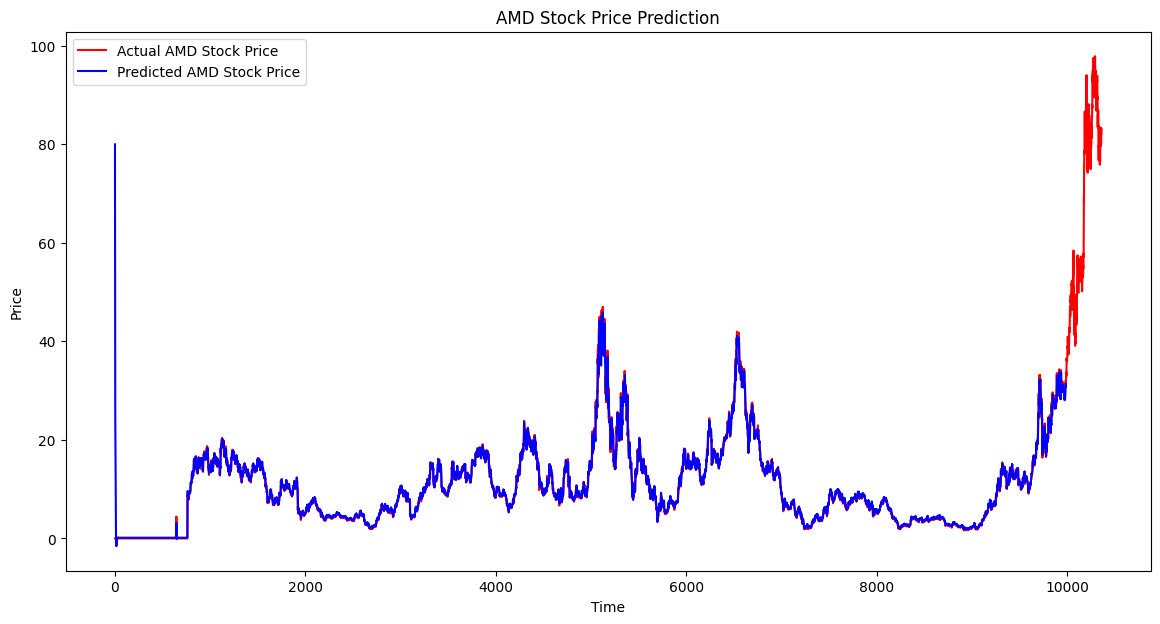

In [19]:
plt.figure(figsize=(14, 7))
plt.plot(actual_stock_price, color='red', label='Actual AMD Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted AMD Stock Price')
plt.title('AMD Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()